In [2]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import modules.utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from scipy.interpolate import griddata
# 

In [11]:
Files = ['../shrad-data/raw/ps113_GUV_000350_C_180602_1450.csv',
         '../shrad-data/raw/ps113_GUV_000350_C_180602_1500.csv']

DS = utils.load_rawdata_and_combine(Files,
                                    CalibFile="data/GUVis_calibrations.json")
DS = DS.assign_attrs({'pfx':'ps113'})
DS2 = utils.add_ins_data(DS.copy())
DS3 = utils.correct_uv_cosine_response(DS2.copy(),
                                       Channels=['305'],
                                       File="data/Correction_function_GUVis3511_SN351.csv")

### calibrate radiation data  to W m-2 nm with interpolating 
### between calibrations
CDS = utils.get_calibration_factor(np.datetime64("2018-06-02"),
                                   File="data/GUVis_calibrations.json")


Load raw data from 2 file(s)...
  |Read file 1/2 with 2.54MB.
  |Read file 2/2 with 2.84MB.
  |Calibrate Radiation data ...
  |... done
... done
Merging INS data ...
... done
Apply UV channel cosine response correction ...
... done


In [15]:
DS.rename_vars()

<xarray.Dataset>
Dimensions:            (time: 18000)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
    channel            int64 305
Data variables: (12/31)
    MeasurementMode    (time) int64 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    DateTimeUTC        (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    Millisecond        (time) int64 37 109 170 259 298 ... 130 201 261 326 392
    EsRoll             (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch            (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    ...                 ...
    EsTemp             (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    BioShadeAngle      (time) float64 0.5906 0.5906 0.5906 ... 141.2 140.9 140.5
    BioShadeMode       (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A' 'A'
    SolarAzimuthAngle  (time) float64 281.6 281.6 281.6 ... 284.2 284.2 284.2
    SolarZenithAngle   (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
    Es305_corr         (time) float64 4.455 4.432 4.437 ... 4.521 4.517 4.516
Attributes:
    pfx:      ps113

In [4]:
DS


<xarray.Dataset>
Dimensions:            (time: 18000)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
    channel            int64 305
Data variables: (12/31)
    MeasurementMode    (time) int64 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    DateTimeUTC        (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    Millisecond        (time) int64 37 109 170 259 298 ... 130 201 261 326 392
    EsRoll             (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch            (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    ...                 ...
    EsTemp             (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    BioShadeAngle      (time) float64 0.5906 0.5906 0.5906 ... 141.2 140.9 140.5
    BioShadeMode       (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A' 'A'
    SolarAzimuthAngle  (time) float64 281.6 281.6 281.6 ... 284.2 284.2 284.2
    SolarZenithAngle   (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
    Es305_corr         (time) float64 4.455 4.432 4.437 ... 4.521 4.517 4.516
Attributes:
    pfx:      ps113

In [7]:
DS.SolarAzimuthAngle.values=DS.SolarAzimuthAngle.values*np.zeros(18000)
DS

<xarray.Dataset>
Dimensions:            (time: 18000)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
    channel            int64 305
Data variables: (12/31)
    MeasurementMode    (time) int64 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    DateTimeUTC        (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    Millisecond        (time) int64 37 109 170 259 298 ... 130 201 261 326 392
    EsRoll             (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch            (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    ...                 ...
    EsTemp             (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    BioShadeAngle      (time) float64 0.5906 0.5906 0.5906 ... 141.2 140.9 140.5
    BioShadeMode       (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A' 'A'
    SolarAzimuthAngle  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SolarZenithAngle   (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
    Es305_corr         (time) float64 4.455 4.432 4.437 ... 4.521 4.517 4.516
Attributes:
    pfx:      ps113

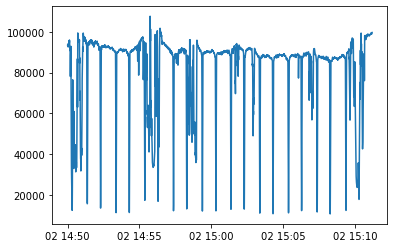

In [5]:
plt.plot(DS.time,DS.Es0)
# plt.plot(DS0.time,DS0.Es0)

In [44]:
CDS

<xarray.Dataset>
Dimensions:                    (channel: 19)
Coordinates:
  * channel                    (channel) int64 305 340 380 412 ... 1550 1640 0
Data variables:
    centroid_wvl               (channel) float64 297.4 340.4 ... 1.645e+03 0.0
    calibration_factor         (channel) float64 0.01972 0.03777 ... 0.03002
    calibration_factor_stored  (channel) float64 0.01905 0.03711 ... 0.03002
    signal_noise_ratio         (channel) float64 0.01972 0.03777 ... 0.03002

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot(DS2.time,DS2.Es305_corr.values/DS2.Es305.values,'b')
plt.plot(DS2.time,DS3.Es305.values/DS2.Es305.values,'g')
# plt.plot(DS3.time,DS3.Es305.values,'r:')
# axis=plt.axis()
# plt.axis([axis[0],axis[1],4,4.5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [2]:
DS3

<xarray.Dataset>
Dimensions:            (time: 18000)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
Data variables: (12/35)
    MeasurementMode    (time) int64 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    DateTimeUTC        (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    Millisecond        (time) int64 37 109 170 259 298 ... 130 201 261 326 392
    EsRoll             (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch            (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    ...                 ...
    SolarZenithAngle   (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
    yaw                (time) float64 51.5 51.5 51.5 51.5 ... 53.0 53.03 53.09
    pitch              (time) float64 1.076 1.067 1.049 ... 1.017 1.056 1.095
    lon                (time) float64 -16.94 -16.94 -16.94 ... -16.89 -16.89
    lat                (time) float64 26.53 26.53 26.53 ... 26.57 26.57 26.57
    roll               (time) float64 0.4199 0.4209 0.4268 ... 0.2074 0.201
Attributes:
    pfx:      ps113

In [8]:
import xarray as xr

ds = xr.open_dataset("example-data/ancillary/ps113_INS_20180602.nc")

ds


<xarray.Dataset>
Dimensions:  (time: 18001)
Coordinates:
  * time     (time) datetime64[ns] 2018-06-02T14:45:00 ... 2018-06-02T15:15:00
Data variables:
    yaw      (time) float64 ...
    pitch    (time) float64 ...
    lon      (time) float64 ...
    lat      (time) float64 ...
    roll     (time) float64 ...
Attributes:
    Instrument:      Polarstern_Hydrins
    License:         For non-commercial use only.
    Title:           Data of inertial navigation system (INS) measured during...
    Author:          Jonas Witthuhn (witthuhn@tropos.de)
    Conventions:     CF-1.7, if possible
    Source:          Product derived from GUVis - ShRad(1.0)
    Contact_person:  Hartwig Deneke plus satellite group, sat@tropos.de
    Institution:     Leibniz Institute for Tropospheric Research (TROPOS), Le...
    History:         Data file generated at ps113 at 2018-10-23 06:22:31 Z by...

In [ ]:
ds.

In [6]:

len(np.unique([1,1]))


1

In [9]:
import configparser
CONFIG = configparser.ConfigParser(interpolation=configparser.ExtendedInterpolation)
CONFIG.read("ConfigFile.ini")

TypeError: before_read() missing 1 required positional argument: 'value'

In [10]:
import xarray as xr
import numpy as np
import datetime as dt

ins = xr.open_dataset("../shrad-data/ancillary/ps113_INS_20180602.nc")
ins1 = ins.copy()
for attr in ['long_name','standard_name','valid_range','units','calendar']:
    ins1['time'].attrs.pop(attr)
ins1.time.values = np.datetime64("1970-01-01")+(ins1.time.values*1000.).astype('timedelta64[ms]')


ins1 = ins1.swap_dims({'t':'time'})
ins1 = ins1.where((ins1.time>=np.datetime64("2018-06-02T14:45")),drop=True)
ins1 = ins1.where((ins1.time<=np.datetime64("2018-06-02T15:15")),drop=True)

encoding = {}
for var in ins1.keys():
    print(var)
    encoding.update({var:{'zlib':True}})
    ins1[var].attrs.pop('valid_range')
    if not var in ['lat','lon']:
        ins1[var].attrs.pop('notes')
        

ins1['pitch'].attrs.update({'standard_name':"platform_pitch_fore_up"})
ins1['roll'].attrs.update({'standard_name':"platform_roll_starboard_down"})
ins1['yaw'].attrs.update({'standard_name':"platform_yaw_fore_starboard",
                          'long_name':"platform_yaw_angle_positive_clockwise_from_bow"})

ins1
ins1.to_netcdf("example-data/ancillary/ps113_INS_20180602.nc",encoding=encoding)

yaw
pitch
lon
lat
roll


In [6]:
(ins.time.values*1000).astype(datetime[:10]

<xarray.DataArray 'time' (t: 10)>
array([1.527898e+09, 1.527898e+09, 1.527898e+09, 1.527898e+09, 1.527898e+09,
       1.527898e+09, 1.527898e+09, 1.527898e+09, 1.527898e+09, 1.527898e+09])
Dimensions without coordinates: t
Attributes:
    long_name:      seconds since UNIX standard epoc (1970-01-01T00:00:00)
    standard_name:  time
    units:          s
    calendar:       gregorian
    valid_range:    [0.e+00 5.e+12]

In [4]:
import xarray as xr
import numpy as np
import datetime as dt

ds = xr.open_dataset("../shrad-data/ancillary/ps113_MET_20180602.nc")
ds1 = ds.copy()
for attr in ['long_name','standard_name','valid_range','units','calendar']:
    ds1['time'].attrs.pop(attr)
ds1.time.values = np.datetime64("1970-01-01")+(ds1.time.values*1000.).astype('timedelta64[ms]')


ds1 = ds1.swap_dims({'t':'time'})
ds1 = ds1.where((ds1.time>=np.datetime64("2018-06-02T14:45")),drop=True)
ds1 = ds1.where((ds1.time<=np.datetime64("2018-06-02T15:15")),drop=True)


ds2 = xr.Dataset({'P':('time',ds1.P.data*100.),
                  'T':('time',ds1.T.data+273.15),
                  'RH':('time',ds1.RH.data/100.)},
                 coords={'time':('time',ds1.time.data)})

ds2['P'].attrs.update({'units':'Pa',
                       'standard_name':'air_pressure'})
ds2['T'].attrs.update({'units':'K',
                       'standard_name':'air_temperature'})
ds2['RH'].attrs.update({'units':'1',
                        'standard_name':"relative_humidity"})
                       
encoding = {}
for var in ds2.keys():
    print(var)
    encoding.update({var:{'zlib':True}})
        

ds2.to_netcdf("example-data/ancillary/ps113_MET_20180602.nc",encoding=encoding)
ds2

P
T
RH


<xarray.Dataset>
Dimensions:  (time: 31)
Coordinates:
  * time     (time) datetime64[ns] 2018-06-02T14:45:00 ... 2018-06-02T15:15:00
Data variables:
    P        (time) float64 1.02e+05 1.02e+05 1.02e+05 ... 1.02e+05 1.02e+05
    T        (time) float64 292.0 292.1 292.1 292.0 ... 292.1 292.1 291.9 291.9
    RH       (time) float64 0.72 0.73 0.73 0.73 0.73 ... 0.75 0.75 0.73 0.73

In [65]:
a=['a','b','c']
b=['a','b','c','d']
c = ['a','c','e']
if all(ai in c for ai in a):
    print(True)
required_vars=a
print(f"The INS data given did not have all required variables ({required_vars})!")

The INS data given did not have all required variables (['a', 'b', 'c'])!


In [8]:
ins.pitch


<xarray.DataArray 'pitch' (t: 863999)>
[863999 values with dtype=float64]
Dimensions without coordinates: t
Attributes:
    notes:          Some INS-systems may define the pitch angle 'bow_down', b...
    long_name:      platform_pitch_angle_positive_bow_up
    standard_name:  platform_pitch_angle
    units:          degrees
    valid_range:    [     0. 360000.]